<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Fontes de erro

Os erros podem ter várias origens:
 - Erros no Modelo/Dados
 - Erros de Discretização
 - Erros de Convergência
 - Erros do sistema de representação (Sistema de virgula flutuante)
 
 
**Objetivo:**  Categorizar e diferenciar cada tipo de erro e explorar algumas abordagens simples fazer a analise do erro e sua propagação.

## Erro no modelo ou dados

Erros na formulação do problema
 - Lotka-Volterra - coelhos fracionários, sem extinções, etc.
 - Erro de dados - Imprecisão na medição ou incertezas nos parâmetros
 
Infelizmente, não podemos controlar o erro de modelo e dados diretamente, mas podemos usar métodos que podem ser mais robustos na presença desses tipos de erros.

## Erro de Discretização ou Truncamento

Erros decorrentes da aproximação de uma função com uma função mais simples, por exemplo: Usar a aproximação $\sin(x) \approx x$ quando $|x| \approx 0$. 

## Erro do sistema de representação 

Erros decorrentes da aproximação de números reais com números de precisão e aritmética finitas.

## Erro de convergência

Em alguns casos, o algoritmo é iterativo. A solução é calculada por aproximações sucessivas com base numa aproximação inicial. O erro gerado em cada etapa é acumular ou aumentar em cada iteração. 

A palavra aproximação, como vamos usar, significa valor próximo do
valor real duma grandeza que vem afecto duma incerteza. Onde a
incerteza expressa a dúvida na validade do resultado duma medida. O
valor duma grandeza submetida a medição costuma ser adquirida
através dum procedimento que, em geral, envolve algum(s)
instrumento(s) de medição.

<img align=left src="./images/bug.jpg">

O próprio processo de medição, assim como o instrumento utilizado,
tem limites de precisão e exatidão, ou seja toda a medição
realizada tem uma incerteza associada. Neste sentido é usual usar
expressões do tipo
$$\overline{x}\pm M_x$$
para expressar a medida duma grandeza $x$, onde $\overline{x}$ é uma
aproximação à medida de $x$ e o valor de $M_x$ quantifica a
incerteza dessa medida. Assim o intervalo
$[\overline{x}-M_x,\overline{x}+M_x]$ é denominado intervalo de
confiança e tem, muitas vezes, uma probabilidade associada de que a
medida de $x$ caia dentro da faixa de valores definida pelo
intervalo, i.e.
$$
x\in[\overline{x}-M_x,\overline{x}+M_x].
$$
São assim usuais as notações:
$$
x=\overline{x}\pm M_x\text{ e } x=\overline{x}(M_x).
$$

## Definições básicas

Antes de explorar os diferentes tipos de erro, é importante primeiro definir como podemos quantificar o erro.


Dado uma grandeza $x$ e sendo $\overline{x}$ uma aproximação a essa
grandeza chama-se \emph{erro absoluto} do valor aproximado
$\overline{x}$ a 
$$|\varepsilon_{\overline{x}|}=|x-\overline{x}|.$$
Naturalmente se $x=\overline{x}\pm M_x$ temos
$$M_x\geq\varepsilon_{\overline{x}}.$$

Muitas vezes é fundamental definir rankings de aproximação para
determinadas grandezas através da comparação de aproximações. Nestes
casos o erro absoluto não é suficientemente informativo. Definimos
por isso:

Dado uma grandeza $x\neq0$ e sendo $\overline{x}$ uma aproximação a
essa grandeza chama-se erro relativo, $r_{\overline{x}}$, do valor
aproximado $\overline{x}$ ao cociente em valor absoluto
$$r_{\overline{x}}=|\frac{x-\overline{x}}{c}|=|\frac{\varepsilon_{\overline{x}}}{x}|.$$
E ao produto $100\times r_{\overline{x}}$, expressão em percentagem,
chama-se percentagem do erro, $P_\varepsilon$

### Exemplo

Pediu-se a duas pessoas para contarem laranjas de dois cestos. A
primeira contou 980 laranjas dum cesto de 1000 e a segunda contou
480 dum cesto de 500. Apesar de cometerem o mesmo erro absoluto
($\varepsilon_1=20$ laranjas e $\varepsilon_1=20$ laranjas) a
segunda cometeu um erro maior, visto que $r_1=\frac{20}{1000}=0.002$
e $r_2=\frac{20}{500}=0.04$.

Como não se conhece o valor exacto da grandeza $x$, tendo-se apenas
a informação do tipo $x=\overline{x}\pm M_x$ toma-se para valor
aproximado do erro relativo de $\overline{x}$
$$r_{\overline{x}}\approx\frac{M_x}{|\overline{x}|}$$
e
$$r_{\overline{x}}\leq\frac{M_x}{\overline{x}-M_x}$$

### Algarismos significativos

O conceito de algarismos significativos foi desenvolvido para
descrever formalmente a confiança que se tem num valor numérico como
medida duma grandeza. Os algarismos significativos dum número são
aqueles que podem ser usados com confiança. Correspondendo ao número
de dígitos corretos mais um que é estimado.

<img align=left src="./images/meter.jpg">

Em alguns casos a noção de algarismo significativo pode gerar alguma
confusão. Por exemplo, nem sempre o zero é um algarismo
significativo uma vez que podem ser usados para localizar a virgula.
Os números 0.00001845, 0.0001845 e 0.001845 têm quatro algarismos
significativos. Quando o zero aparece no fim de números grandes pode
não ser claro que zeros, caso exista algum, são significativos. Por
exemplo, 53000 pode ter três, quatro ou cinco algarismos
significativos. Esta incerteza é resolvida com o recurso à notação
científica.

Na notação científica o valor da medição é expressa com auxílio duma
produto por uma potência de 10. Escreve-se o valor da medição na
forma decimal com apenas um digito diferente de zero antes da
vírgula, completado com os restantes dígitos e multiplicado por uma
potência de 10, i.e. é um decimal na forma
$$\pm d_0.d_1d_2\ldots d_{p-1}\times10^e$$
onde $0\leq d_0,d_1d_2\ldots d_{p-1}\leq 9$ são algarismos com
$d_0\neq0$. Denotado muitas vezes por
$$\pm d_0.d_1d_2\ldots d_{p-1}Ee.$$

Assim, podemos escrever de forma única (sem zeros à direita):
$0.00001845=1.845E-5$, $0.0001845=1.845E-4$ e $0.001845=1.845E-3$.
Escreveremos $4.53E4$, $4.530E4$ e $4.5300E4$ para representar que
os números que têm respectivamente três, quatro e cinco algarismos
significativos, respectivamente.

O conceito pode ser formalizado usando a noção de erro absoluto:


Seja $\overline{x}$ uma aproximação para $x$. Diz-se que
$\overline{x}$ tem $k$ casas `decimais correctas` se e só se
$$|\varepsilon_x|\leq0.5\times10^{-k}.$$
Diz-se que $\overline{x}$ tem $k$ `algarismos significativos`
se e só se $|r_x|\leq5\times10^{-k}$.


Exemplo
* if $r = 0.001 < 5\times10^{-3}$ tem $k=3$ dígitos significativos
* if $r = 0.006 < 5\times10^{-2}$ has $k=2$ dígitos significativos (porque esse erro causaria arredondamento) 

O número de algarismos significativos é importante para definir a
precisão que se tem nos dados, bem como para avaliar a utilidade que
têm os resultados dos métodos numéricos. A incerteza que se tem nos
dados é propagada ao output dos métodos, degradando a confiança que
se tem nos resultados. Este facto é motivada, para além dos erros de
aproximação iniciais, à estrutura usada para representar a
informação e à natureza do próprio algoritmo.

### Exemplo

Seja
$$
    f = e^1,\quad F=2.71
$$

In [2]:
f = numpy.exp(1.)
F = 2.71
e = numpy.abs(f - F)
r = e/numpy.abs(f)
p = int(-numpy.log10(r/5.))
print('f = {}'.format(f))
print('F = {}'.format(F))

print('Erro absoluto: {}'.format(e))
print('Erro relativo: {}'.format(r))
print('Precisão decimal: {}'.format(p))

f = 2.718281828459045
F = 2.71
Erro absoluto: 0.008281828459045126
Erro relativo: 0.0030467144253912685
Precisão decimal: 3


### Erros de Truncatura

É usual encarar os erros de truncatura como erros associados a
processos de desratização do universo. São motivados pela tentativa
de tornar finitos processos que são por natureza infinitos. Isto é
motivado pela necessidade de tornar computáveis procedimentos que à
partida não o são, i.e. não podem ser implementados e executados num
computador num número finito de passos.



Muitas das constantes e funções usadas em matemática são descritos
de forma "simples" e eficiente por procedimentos que envolvem um
número infinito de passos. Por exemplo a constante $\pi$ é definida
como sendo:

$\pi$ é a razão entre o perímetro e o diâmetro de qualquer circulo.

O seu valor tem sido aproximado desde a antiguidade. Os babilónicos
anteriores ao século XIX antes de Cristo usavam $\pi\approx25/8$, o
que corresponde a uma aproximação com um erro relativo de $0.5\%$.
Os Egípcios faziam $\pi\approx256/81$.

[Arquimedes usando o método da exaustão](https://en.wikipedia.org/wiki/Method_of_exhaustion), aproximou o perímetro dum
usando dois polígonos com 96 vértices, um inscrito no circulo de
vértice no circulo, o outro maior, contendo o circulo e tais que a
aresta são tangents ao circulo, concluiu que $\pi$ está entre
$223/71$ e $22/7$. Aumentando o número de vértices usadas no método
para definir os polígono podemos reduzir o intervalo de incerteza
aumentando o número de dígitos significativos da aproximação. A
amplitude do intervalo de confiança pode ser visto como o erro de
truncatura já que quando o número de vértices dos polígonos tende
para infinito o comprimento dos polígonos tende para o perímetro da
circunferência.
![title](./images/300px-Archimedes_pi.svg)

Esta grandeza pode ser quantificada pela série:
$$\pi=4-\frac{4}{3}+\frac{4}{5}-\frac{4}{7}-\ldots.$$
Esta expressão permitamos determinar aproximações para a constante.
Esta aproximação será tanto melhor quanto maior for o número de
termos que se usar. Assim, vamos chamar erro de truncatura à
aproximação definida pelos primeiros $n$ termos à soma dos restantes
termos. Neste caso prova-se que, o erro de truncatura usando os
primeiros $n$ termos é maior do que $(2n)^{-1}$ convergindo muito
lentamente para $\pi$. Para obtermos duas casas decimais exactas
necessitamos de somar os primeiros 300 termos.


|$n$ | soma dos $n$ termos | erro de truncatura |
|----|--------------------|---------------|
|  1 |  4.000000000000000 |  0.8584073464 |
|  2 |  2.666666666666670 |  0.4749259869 |
|  3 |  3.466666666666670 |  0.3250740131 |
|  4 |  2.895238095238100 |  0.2463545584 |
|  5 |  3.339682539682540 |  0.1980898861 |
|  6 |  2.976046176046180 |  0.1655464775 |
|  $\vdots$ | $\vdots$ | $\vdots$ |
|341 |  3.144525198604630 |  0.0029325450 |
|342 |  3.138668683231280 | 0.0029239704 |
|343 |  3.144508099289670 | 0.0029154457 |
|344 |  3.138685682986910 | 0.0029069706 |
|345 |  3.144491198226380 | 0.0028985446 |
|346 |  3.138702486214810 | 0.0028901674 |

Existem procedimentos para aproximar $\pi$ muito mais eficientes. Um
exemplo extraordinário foi descoberto por [Ramanujan](https://en.wikipedia.org/wiki/Srinivasa_Ramanujan) em 1914
apresentado através da série
$$
\frac{1}{\pi}=\frac{\sqrt{8}}{9801}\sum_{n=0}^\infty\frac{(4n)!}{(n!)^4}\frac{[1103+26390n]}{396^{4n}}
$$
Que permite implementar algoritmos muito eficientes para calcular
aproximações a $\pi$.

Estes processos infinitos aparecem muitas vezes associados à
definição de funções por séries de potência. Por exemplo no caso de
$$\pi=4-\frac{4}{3}+\frac{4}{5}-\frac{4}{7}-\ldots.$$
usou-se o desenvolvimento da função $\arctan$ como série de
potência: $$\arctan
x=x-\frac{x^3}{3}+\frac{x^5}{5}-\frac{x^7}{7}+\ldots$$ e tivemos em
conta que $\arctan(1)=\frac{\pi}{4}$.

O processo mais simples para a sua obtenção destes desenvolvimentos
é descrito no resultado enunciado por [Brook Taylor](https://en.wikipedia.org/wiki/Brook_Taylor) em 1715:

#### Terorema de Taylor
Se $f$ admite derivadas contínuas até à ordem $n$ (inclusivé) em
$[a,b]$, isto é, se $f\in C^n([a,b])$, e se $f^{(n+1)}$ existe em
$]a,b[$, então
$$f(x)=T_n(x,x_0)+R_n(x;x_0),$$
onde
$$T_n(x,x_0)=\sum_{k=0}^n\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k$$
e
$$
R_n(x;x_0)=\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-x_0)^{n+1},\, \xi\in
I\{x,x_0\}
$$
sendo $I\{x,x_0\}$ o intervalo aberto definido por $x$ e $x_0$.


A $f(x)=T_n(x,x_0)+R_n(x;x_0)$ chamamos `fórmula de Taylor` sendo
$T_n(x;x_0)$ o `polinómio de Taylor` de $f$ em torno do ponto $x_0$ e
$R_n(x;x_0)$ o `resto (de Lagrange)` de ordem $n$ (ou de grau $n+1$).


Se $x_0=0$ à fórmula de Taylor $f(x)=T_n(x,0)+R_n(x;0)$ chamaremos
`fórmula de Maclaurin`.

Atente-se ao grande interesse prático deste resultado que afirma
que, mediante certas condições, uma função pode ser escrita como a
soma de um polinómio com um resto. Escolhendo valores de $x$ e $x_0$
tais que
$$
\lim_{n\rightarrow+\infty}R_n(x;x_0)=0
$$
temos que, a partir dum valor para $n$ suficientemente grande, a
função dada pode ser aproximada pelo seu polinómio de Taylor. Assim,
como qualquer operação a efetuar sobre a função (derivação, integração,
etc).

### Exemplo

Por exemplo a função $f(x)=e^x$ é de classe $C^\infty$ (i.e. admite
derivadas contínuas de todas as ordens, $f^{(n)}(x)=e^x$) tem por
desenvolvimento em série de Maclaurin
$$
e^x=\sum_{k=0}^\infty\frac{x^k}{k!}.
$$
Assim, fixando um valor para $n$, temos que
$$
e^x=1+x+\frac{x^2}{2}+\frac{x^3}{3!}+\frac{x^4}{4!}+\ldots+\frac{x^n}{n!},
$$
com
$$
|R_n(x;x_0)|\leq\frac{e^x}{(n+1)!}|x^{n+1}|\leq\frac{3^x}{(n+1)!}|x^{n+1}|.
$$
Apresentamos numa tabela o erro absoluto provocado pela truncatura
da série aos primeiros 16 termos quando
$x\in\{0.1,0.5,1.0,0.5,2.0\}$.


|    | 0.1 | 0.5 | 1.0 | 1.5 | 2.0 |
|--- | --- | --- | --- | --- | --- |
|1 |  0.005580616 | 0.216506351| 1.500000000| 5.845671476| 18.0000000|
| 2 |  0.000186021| 0.036084392| 0.500000000 |2.922835738| 12.0000000|
| 3 |  0.000004651| 0.004510549| 0.125000000 |1.096063402| 6.000000000|
| 4 |  0.000000093| 0.000451055| 0.025000000 |0.328819020| 2.400000000|
| 5 |  0.000000002| 0.000037588| 0.004166667 |0.082204755| 0.800000000|
| 6| 0.000000000| 0.000002685| 0.000595238| 0.017615305| 0.228571429|
|7| 0.000000000| 0.000000168| 0.000074405| 0.003302870| 0.057142857|
| 8| 0.000000000| 0.000000009| 0.000008267| 0.000550478| 0.012698413 |
|9| 0.000000000| 0.000000000| 0.000000827| 0.000082572| 0.002539683|
| 10| 0.000000000| 0.000000000| 0.000000075| 0.000011260| 0.000461760 |
|11| 0.000000000| 0.000000000| 0.000000006| 0.000001407| 0.000076960|
| 12| 0.000000000| 0.000000000| 0.000000000| 0.000000162| 0.000011840 |
|13| 0.000000000| 0.000000000| 0.000000000| 0.000000017| 0.000001691|
| 14| 0.000000000| 0.000000000| 0.000000000| 0.000000002| 0.000000226 |
|15| 0.000000000| 0.000000000| 0.000000000| 0.000000000| 0.000000028|
| 16| 0.000000000| 0.000000000| 0.000000000| 0.000000000| 0.000000003 |
|17| 0.000000000| 0.000000000| 0.000000000| 0.000000000| 0.000000000|

Assim, para determinar uma aproximação ao valor de $e^2$ com 3 casas
decimais correctas temos de definir o polinómio de Taylor de ordem,
pelo menos,10. Assim temos
$$
e^2\approx\sum_{k=0}^{10}\frac{x^k}{k!}=7.38899470899\approx7.389.
$$

### Notação Big-O

Nestas situações, uma aproximação ao valor de uma função tem um parâmetro associado (no nosso exemplo número de termos) , e o valor desse parâmetro geralmente é escolhido para garantir que o erro seja aceitável para um problema particular. Em tais circunstâncias, geralmente queremos saber o impacto no erro se alterarmos o valor do parâmetro. Isso levou à definição da notação Big-O:
$$
    f(x) =  O(g(x)) \quad \text{quando} \quad x \rightarrow a
$$ 
se e só se
$$
    |f(x)| \leq M |g(x)| \quad \text{quando}\quad  |x - a| < \delta \quad \text{onde} \quad M,a > 0.
$$ 

Na prática, recorremos à notação Big-O para identificar a ordem dos termos que se deixa de fora  numa série. Vimos um exemplo disso com as aproximações usando séries de Taylor.

#### Exemplo:

Por exemplo para $f(x)=e^x$ é de classe $C^\infty$ que tem por
desenvolvimento em série de Maclaurin
$$
e^x=\sum_{k=0}^nfty\frac{x^k}{k!}.
$$
ou seja 
$$
e^x=1+x+\frac{x^2}{2}+\frac{x^3}{3!}+\frac{x^4}{4!}+\ldots
$$
pode ser escrita para $x\approx0$ usando notação Big-O como
$$
e^x=1+x+\frac{x^2}{2}+\frac{x^3}{3!}+O(x^4)
$$
$$
e^x=1+x+\frac{x^2}{2}+O(x^3)
$$
$$
e^x=1+x+O(x^2)
$$
$$
e^x=1+O(x)
$$

#### Exemplo:
Dado $f(x) = \sin x$ with $x_0 = 0$,  então o polinómio de Taylor (série truncada de Taylor) de $f(x)$ expandido em torno de $x_0=0$ é

$$T_N(x) = \sum^N_{n=0} (-1)^{n} \frac{x^{2n+1}}{(2n+1)!}$$



Para $N=2$, podemos escrever $f(x)$  como

$$f(x) = x - \frac{x^3}{6} + \frac{x^5}{120} + O(x^7)$$

Isso é  mais útil quando usamos  $x = x_0 + \Delta x$:

$$f(\Delta x) = \Delta x - \frac{\Delta x^3}{6} + \frac{\Delta x^5}{120} + O(\Delta x^7)$$

**Podemos desenvolver regras para a propagação de erros com base na notação Big-O:**

Em geral, podemos derivar dois resultados  para valor de $x$ é grande:

Seja
$$\begin{aligned}
    f(x) &= p(x) + O(x^n) \\
    g(x) &= q(x) + O(x^m) \\
    k &= \max(n, m)
\end{aligned}$$
Então
$$
    f+g = p + q + O(x^k)
$$
e
\begin{align}
    f \cdot g &= p \cdot q + p O(x^m) + q O(x^n) + O(x^{n + m}) \\
    &= p \cdot q + O(x^{n+m})
\end{align}

Por outro lado, para valores pequenos de $x$, digamos $\Delta x$, as expressões anteriores podem ser modificadas da seguinte maneira:

Caso
\begin{align}
    f(\Delta x) &= p(\Delta x) + O(\Delta x^n) \\
    g(\Delta x) &= q(\Delta x) + O(\Delta x^m) \\
    r &= \min(n, m)
\end{align}
Temos
$$
    f+g = p + q + O(\Delta x^r)
$$
e
\begin{align}
    f \cdot g &= p \cdot q + p \cdot O(\Delta x^m) + q \cdot O(\Delta x^n) + O(\Delta x^{n+m}) \\
    &= p \cdot q + O(\Delta x^r)
\end{align}

**Nota:** Nesse caso, supomos que pelo menos um polinômio com $k = \max(n, m)$ tem o seguinte formato: 

$$
    p(\Delta x) = 1 + p_1 \Delta x + p_2 \Delta x^2 + \ldots
$$
ou
$$
    q(\Delta x) = 1 + q_1 \Delta x + q_2 \Delta x^2 + \ldots
$$

assim existe pelo menos um termo $\mathcal{O}(1)$ para garantir a existênsia de $\mathcal{O}(\Delta x^r)$ no produto final. 

Para entender por que nos preocupamos mais com a potência em $\Delta x$ ao considerar a convergência, a figura a seguir mostra como diferentes potências na taxa de convergência podem afetar a rapidez com que convergimos para a nossa solução. Observe que estamos a espoçar as funções de duas maneiras diferentes. Traçamos o erro em função de $\Delta x$ é a maneira usual de mostrar que um método numérico converge. Como os erros podem diminuir rapidamente, é muito comum desenhar esses tipos de gráficos a uma escala de logarítmica para facilitar visualização  dos resultados. Observe que, se um método for realmente da ordem $n$, o erro é uma função linear no espaço na escala de logarítmica com a inclinação $n$.


#### Comportamento do erro em função de $\Delta x$

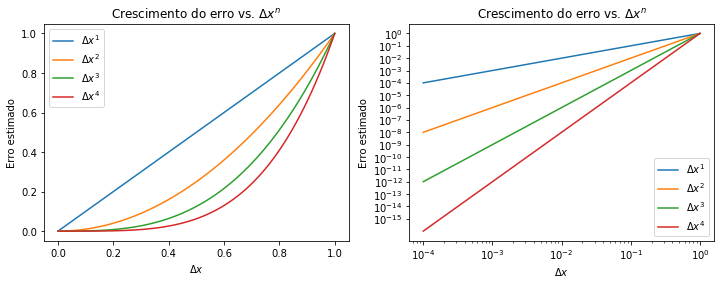

In [3]:
dx = numpy.linspace(1.0, 1e-4, 100)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = []
axes.append(fig.add_subplot(1, 2, 1))
axes.append(fig.add_subplot(1, 2, 2))

for n in range(1, 5):
    axes[0].plot(dx, dx**n, label="$\Delta x^%s$" % n)
    axes[1].loglog(dx, dx**n, label="$\Delta x^%s$" % n)

axes[0].legend(loc=2)
axes[1].set_xticks([10.0**(-n) for n in range(5)])
axes[1].set_yticks([10.0**(-n) for n in range(16)])
axes[1].legend(loc=4)
for n in range(2):
    axes[n].set_title("Crescimento do erro vs. $\Delta x^n$")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Erro estimado")

plt.show()

Do Teorema de Taylor temos que  para $f(x) \in C^{m+1}[a,b]$ e $x_0 \in [a,b]$, para todo $x \in (a,b)$ existe um número $c = c(x)$ entre $x_0$ e $x$ tal que

$$ f(x) = T_N(x) + R_N(x)$$

onde $T_N(x)$ é a aproximação polinomial de Taylor

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot(x-x_0)^n}{n!}$$

e $R_N(x)$ é o residual (a parte da série que paramos)

$$R_N(x) = \frac{f^{(n+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}$$

### Nota


O residual:

$$
    R_N(x) = \frac{f^{(n+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}
$$
depende da derivada de ordem $ n + 1 $ de $ f $ avaliado num valor **desconhecido** $c\in[x,x_0]$. 

Se soubéssemos o valor de $c$, saberíamos o valor exato de $R_N(x)$ e, portanto, a função $f(x)$. Em geral, não conhecemos esse valor, mas podemos usar $R_N(x)$ para majorar o limites superiores no erro **e** para compreender como o erro varia à medida que nos afastamos de $x_0$.

Comece substituindo $x - x_0$ por $\Delta x$.  A idéia principal aqui é que o residual $R_N(x)$ se torne pequeno quando $\Delta x \rightarrow 0$ (em que ponto point $T_N(x) = f(x_0)$).

$$
    T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot\Delta x^n}{n!}
$$

e $R_N(x)$ é o residuo (a parte da série que paramos)

$$
    R_N(x) = \frac{f^{(n+1)}(c) \cdot \Delta x^{n+1}}{(n+1)!} \leq M \Delta x^{n+1} = O(\Delta x^{n+1})
$$

onde $M$ é um limite superior (majorante) de
$$
    \frac{f^{(n+1)}(c)}{(n+1)!}
$$

#### Exemplo 1

$f(x) = e^x$ com $x_0 = 0$ no intervalo $x\in(-1,1)$

Usando isso, podemos encontrar expressões para o erro relativo e absoluto em função de $x$ assumindo como exemplo $N=2$.

Derivadas:
$$\begin{aligned}
    f'(x) &= e^x \\
    f''(x) &= e^x \\ 
    f^{(n)}(x) &= e^x
\end{aligned}$$

Polinómios de Taylor:
$$\begin{aligned}
    T_N(x) &= \sum^N_{n=0} e^0 \frac{x^n}{n!} \Rightarrow \\
    T_2(x) &= 1 + x + \frac{x^2}{2}
\end{aligned}$$

O resíduo:
$$\begin{aligned}
    R_N(x) &= e^c \frac{x^{n+1}}{(n+1)!} = e^c \cdot \frac{x^3}{6} \quad \Rightarrow \\
    R_2(x) &\leq \frac{e^1}{6} \approx 0.5
\end{aligned}$$

Precisão:
\begin{align}
    \exp(1) &= 2.718\ldots \\
    T_2(1) &= 2.5 
\end{align}

$$
\Rightarrow e \approx 0.2,\quad r \approx 0.08,\quad p = 1 
$$

Em Python podemos usar a biblioteca sympy, que tem a capacidade de calcular polinómios de Taylor!

In [4]:
import sympy
sympy.init_printing(pretty_print=True)
x = sympy.symbols('x')
f = sympy.exp(x)
f.series(x0=0, n=3) 

In [5]:
x = 1.
Tn = 1 + x + x**2/2
f = numpy.exp(1.)
e = numpy.abs(f-Tn)
r = e/f
p = int(-numpy.log10(r/5.))
print("T_n = {}, e = {}, r = {}, p = {}".format(Tn,e,r,p))

T_n = 2.5, e = 0.2182818284590451, r = 0.08030139707139415, p = 1


Representemos graficamente isso para num intervalo de $x$.

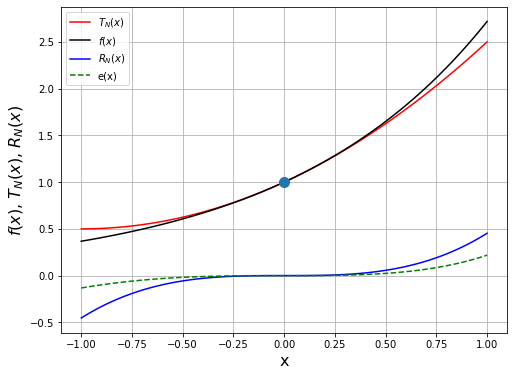

In [6]:
x = numpy.linspace(-1, 1, 100)
f = numpy.exp(x)
T_N = 1.0 + x + x**2 / 2.0
R_N = numpy.exp(1) * x**3 / 6.0

plt.figure(figsize=(8,6))
plt.plot(x, T_N, 'r', x, f, 'k', x, R_N, 'b')
plt.plot(x,numpy.exp(x)-T_N,'g--')
plt.plot(0.0, 1.0, 'o', markersize=10)
plt.grid()
plt.xlabel("x",fontsize=16)
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$", fontsize=16)
plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$", "e(x)"], loc=2)
plt.show()

#### Exemplo 2

Aproxime
$$
    f(x) = \frac{1}{x} \quad x_0  = 1,
$$
na vizinhança de $x_0 = 1$ usando o polinómio de Taylor de ordem 2.

$$
\begin{matrix}
f'(x) = -\frac{1}{x^2}, &  f''(x) = \frac{2}{x^3}, & f'''(x) = -\frac{6}{x^4}, & \ldots, & f^{(n)}(x) &= \frac{(-1)^n n!}{x^{n+1}}
\end{matrix}
$$

$$
\begin{aligned}
    T_N(x) &= \sum^N_{n=0} (-1)^n (x-1)^n \Rightarrow \\
    T_2(x) &= 1 - (x - 1) + (x - 1)^2
\end{aligned}
$$


$$
\begin{aligned}
    R_N(x) &= \frac{(-1)^{n+1}(x - 1)^{n+1}}{c^{n+2}} \Rightarrow \\
    R_2(x) &= \frac{-(x - 1)^{3}}{c^{4}}
\end{aligned}
$$

### Gráfico deste problema

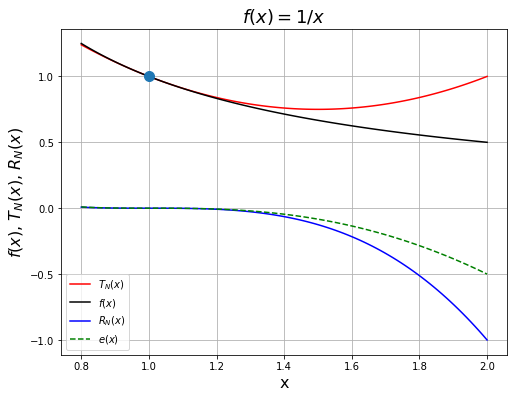

In [7]:
x = numpy.linspace(0.8, 2, 100)
f = 1.0 / x
T_N = 1.0 - (x-1) + (x-1)**2
R_N = -(x-1.0)**3 / (1.**4)

plt.figure(figsize=(8,6))
plt.plot(x, T_N, 'r', x, f, 'k', x, R_N, 'b')
plt.plot(x,f - T_N,'g--')
plt.plot(1.0, 1.0, 'o', markersize=10)
plt.grid(True)
plt.xlabel("x",fontsize=16)
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$",fontsize=16)
plt.title('$f(x) = 1/x$',fontsize=18)
plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$", '$e(x)$'], loc='best')
plt.show()

### Questão Computacional #1: Precisão ... quantos termos?

Dada uma aproximação polinomial de Taylor de uma função analítica  arbitrária $f(x)$,  como determinamos quantos termos são necessários para que $R_N(x)<tol$. E como determinamos a tolerância?

### Questão Computacional #2 Eficiência ... Contagem de operações para a avaliação do polinomial

Dado 

$$P_N(x) = a_0 + a_1 x + a_2 x^2 + \ldots + a_N x^N$$ 

ou

$$P_N(x) = p_0 x^N + p_1 x^{N-1} + p_2 x^{N-2} + \ldots + p_{N}$$

qual é a forma mais **eficiente** de avaliar $P_N(x)$? (i.e. minimizar o número de operações de ponto flutuante)

Considere duas maneiras de escrever $P_3$

* A forma standard:

$$ P_3(x) = p_0 x^3 + p_1 x^2 + p_2 x + p_3$$

* usando multiplicação aninhada ( **Método de Horner**):

$$ P_3(x) = ((p_0 x + p_1) x + p_2) x + p_3$$

Considere o número de operações em cada caso...

$$ P_3(x) = p_0 x^3 + p_1 x^2 + p_2 x + p_3$$

$$P_3(x) = \overbrace{p_0 \cdot x \cdot x \cdot x}^3 + \overbrace{p_1\cdot x \cdot x}^2 + \overbrace{p_2 \cdot x}^1 + p_3$$

Nota: aqui apenas contamos multiplicações, pois elas dominam o processo de cálculo

Para somar todas as operações, podemos usar uma pirâmide onde o número de linhas é o grau do polinómio:

![Original Count](./images/horners_method_big_count.png)

Assim, podemos estimar que o algoritmo  necessita de avaliar aproximadamente $O(N^2 / 2)$ operações para avaliar um polinómio de ordem $N$.

No caso da implementação aninhada:

$$ P_3(x) = ((p_0 x + p_1) x + p_2) x + p_3$$

O  método neste caso é de ordem $O(N)$ em comparação com a primeira avaliação que é de $O(N^2)$.  Essa é uma enorme diferença para grandes valore de $N$!

#### Algorithm

Fill in the function and implement Horner's method:
```python
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    pass
```

In [8]:
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    ### ADD CODE HERE
    pass

In [9]:
p = [1, -3, 10, 4, 5, 5]
x = numpy.linspace(-1, 1, 100)
eval_poly(p,x)

In [10]:
# Scalar version
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    
    y = p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y

In [11]:
# Vectorized version
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x can by a NumPy ndarray.
    """
    
    y = numpy.ones(x.shape) * p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y

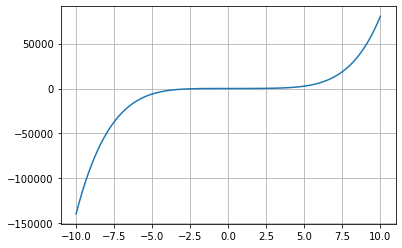

In [12]:
p = [1, -3, 10, 4, 5, 5]
x = numpy.linspace(-10, 10, 100)
plt.plot(x, eval_poly(p, x))
plt.grid()
plt.show()

## Erro de convergência

Em algumas casos, uma fórmula ou algoritmo é aplicada repetidamente como objetivo de se obter uma aproximação final ao valor duma função. Geralmente, os erros que ocorrem em cada etapa individual são pequenos. Repetindo o processo, os erros às vezes aumentam. 

Como exemplo disso o é dado abaixo. Os valores dos termos em uma sucessão definida por recorrência é:
$$
   \begin{align}
      y_0 &= 1, \\
      y_1 &= \frac{1}{5}, \\
      y_{n+1} &= \frac{16}{5} y_n - \frac{3}{5} y_{n-1}.
   \end{align}
$$

O valor exato do termo de ordem $n$ pode ser dado pelo termo geral da sucessão is $y_n = \left(\frac{1}{5}\right)^n$, onde $n=$0, 1, 2, $\ldots$  

In [13]:
# Escolha o número de iterações
N = 40
y = numpy.empty(N+1)            # Aloque um vetor vazio com N+1 entradas

# Agora use a relação de recorrência para gerar os números da sucessão
y[0] = 1
y[1] = 1/5
for n in range(2,N+1):
    y[n] = 16/5*y[n-1] - 3/5*y[n-2]


O gráfico do resultado

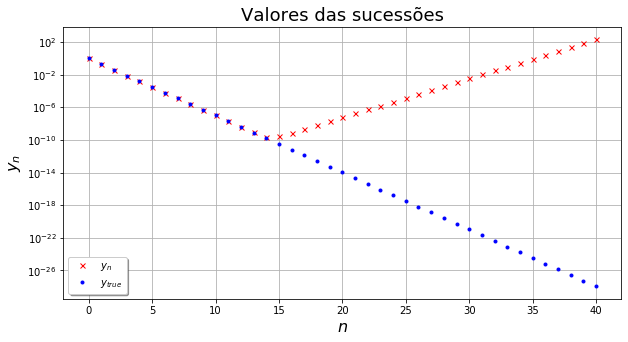

In [14]:
# Now plot the result
n = numpy.arange(0,N+1)
fig = plt.figure(figsize=(10.0, 5.0))
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(n,y, 'rx', markersize=5, label='$y_n$')
axes.semilogy(n,(1/5)**n,'b.', label='$y_{true}$')
axes.grid()
axes.set_title("Valores das sucessões",fontsize=18)
axes.set_xlabel("$n$",fontsize=16)
axes.set_ylabel("$y_n$",fontsize=16)
axes.legend(loc='best', shadow=True)
plt.show()

Na solução exata, a sequência de números gerada acima deve ficar progressivamente cada vez mais próxima de zero. Em vez disso, os números gerados pela relação de recorrência inicialmente tendem a  aproximarem-se de zero, mas a dada altura começam a crescer.  O segundo número na sequência, $ y_1 =\frac{1}{5} $ é aproximado com um pequeno erro e é armazenado no computador como $ y_1 =\frac{1}{5} + \epsilon $  onde $ \epsilon $ representa o erro.


Cada vez que um novo número no loop é gerado, o erro é multiplicado. Por exemplo, após a primeira iteração $y_2$ é
$$
    \begin{align}
       y_2 &= \frac{16}{5} \left( \frac{1}{5}+\epsilon \right) 
               - \frac{3}{5} \left( 1 \right), \\
           &= \frac{1}{5^2} + \frac{16}{5} \epsilon.
    \end{align}
$$

Após a segunda iteração, o valor de $y_3$ é 

$$ 
y_3=\frac{1}{5^3} + \frac{241}{25}\epsilon
$$

Mesmo assim o valor de $\epsilon$ is é muito próximo de zero, no entanto toda iteração faz o erro aumentar. A multiplicação repetida vai acabar por tornar o erro um número muito grande.

O erro associado à representação inicial do número $\frac{1}{5}$ é um problema associado com a maneira usada pelo computador para armazena números no sistema de virgula flutuante. Na maioria dos casos, o computador não pode representar um número exatamente, e os pequenos erros na aproximação de um número pode ser propagado, causando outros problemas.

## Erro de Representação

Erros decorrentes da aproximação de números reais com números de precisão finita

$$\pi \approx 3.14$$

ou $\frac{1}{3} \approx 0.333333333$ em decimal, os resultados usam um número finito de registos para representar cada número.

Comprimir um número infinito de dígitos dum números reais num número
finito de bits exige uma representação aproximada. Apesar de
existirem inteiros em número infinito, na maioria dos programas o
resultado de operações com inteiros é armazenado em 32 bits. Em
contraste, dado qualquer que seja o número de bits a maioria dos
cálculos com números reais tem por resultado grandezas que não podem
ser representadas com exatidão. Assim o resultado dum cálculo com
vírgula flutuante tem de ser arredondado para caber na estrutura
usada para a sua representação. Este erro de aproximação e de
arredondamento caracteriza a computação numérica.

Foram propostas diferentes formas para representar reais, mas a mais
difundida é a representação em vírgula flutuante. Apareceu como uma
truncatura  no sistema de numeração binária da representação em
notação cientifica motivada pelas limitações impostas pelos sistemas
computacionais à estruturas de representação das grandezas reais. A
norma de representação usada na generalidade dos sistemas, foi
apresentada pela IEEE, e limita a representação de reais na unidade
de cálculo em vírgula flutuante a estruturas com 32 ou 64 bits.

<img align=left src="./images/ieee.jpg">

Um sistema de vírgula flutuante têm associado
- uma base $\beta$ (que é assumido ser um natural par) e
- uma precisão $p$.

Se $\beta=10$ e $p=3$, então o número $0.1$ é representado como
$1.00\times10^{-1}$. 

Se $\beta=2$ and $p=18$, então o número decimal
$0.1$ não pode ser representado de forma exacta, mas é
aproximadamente $1.10011001100110011\times2^{-4}$.

### Sistemas de vírgula flutuante

Os números nos sistemas de ponto flutuante são representados usando uma sequência de bits que representam diferentes partes de um número. Nos **sistemas de virgula flutuante normalizados**, existem algumas convenções padrão para o uso desses bits. Em geral, os números são armazenados dividindo-os no formato  

$$F = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times \beta^E$$

Onde
1. $\pm$ é um único bit e representa o sinal do número
2. $d_1 . d_2 d_3 d_4 \ldots d_p$ é chamado de *mantissa*.  Observe que tecnicamente o decimal pode ser movido, mas geralmente, usamos notação científica, e o decimal deve ser colocado como aqui.  Os dígitos $d_2 d_3 d_4 \ldots d_p$ são chamados de *fração* com $p$ dígitos de precisão.  Nos sistemas normalizados colocam especificamente o ponto decimal na frente e assumem $d_1 \neq 0$ a menos que o número seja exatamente $0$.
3. $\beta$ é a *base*.  Para binário $\beta = 2$, para decimal $\beta = 10$, etc.
4. $E$ é o *expoente*, um número inteiro no intervalo $[E_{\min}, E_{\max}]$

No decurso desta exposição usamos o termo número em vírgula
flutuante para designar um número real que pode ser representado de
forma exacta neste formato. Outras duas grandezas estão também
associadas a representação em vírgula flutuante, são elas o maior e
o menor expoente permitido, $E_{max}$ e $E_{min}$. Uma vez que
existem $\beta^p$ mantissas diferentes, e $E_{max}-E_{min}+1$
expoentes possíveis, um número em vírgula pode ser codificado em
$$[\log_2(E_{max}-E_{min}+1)+[\log_2(\beta^p)]]+1$$
bits, onde o +1 final contabiliza o bit que codifica o sinal.


Factos associados ao uso de um sistema de virgula flutuante:
1. Existe um conjunto discreto e finito de números representáveis
2. Os números representáveis não são distribuídos igualmente na linha real
3. A aritmética num sistemas de vírgula flutuante produz resultados que podem ser diferentes da aritmética de precisão infinita (ou seja, matemática "real")

Existem duas razões que fazem com que um número real possa não ser
exatamente representado em vírgula flutuante. A mais comum já foi
apresentada para o decimal $0.1$;
$$
\frac{1}{10}=\frac{1}{2^4}+\frac{1}{2^5}+\frac{0}{2^6}+\frac{0}{2^7}+\frac{1}{2^8}+\frac{1}{2^9}+\frac{0}{2^{10}}+\ldots
$$
Após o primeiro termo a sequência de coeficientes $1,0,0,1$ é
repetida indefinidamente. Assim quando $\beta=2$ o número $0.1$ está
entre dois números em vírgula flutuante, não sendo representado por
nenhum deles. O número em virgula flutuante escolhido para
representar $0.1$ foi obtida arredondando esta série a 18 termos. A
razão, menos comum, que leva a que uma grandeza não seja
representado em vírgula flutuante deve-se à grandeza em valor
absoluto exceder $\beta^{E_{max}+1}$ ou ser inferior a
$\beta^{E_{min}}$. Neste caso dizemos que a grandeza excede o
domínio de representação e a grandeza é representado,
respetivamente, por $\beta^{E_{max}+1}$ ou $\beta^{E_{min}}$.

A representação em vírgula flutuante não é única. Por exemplo, tanto
$1.00\times10^{-1}$ como $0.01\times10^1$ representam $0.1$. Para
garantir a unicidade da representação impomos que o primeiro digito
seja não nulo, neste caso a representação diz-se
`normalizada`.

#### Propriedades dos sistemas de virgula flutuante
Qualquer sistemas de virgula flutuante é caracterizado por:
 - Menor número normalizado (underflow se abaixo - relacionado a números subnormais em torno de zero)
 - Maior número normalizado (overflow se acima)
 - Zero
 - $\epsilon$ da máquina or $\epsilon_{\text{machine}}$
 - `inf` e `nan`, infinidade and **N**ot **a** **N**umber respectivamente

##### Exemplo:  Toy System
Considere um sistema com precisão decimal de dois dígitos (normalizado)
$$f = \pm d_1 . d_2 \times 10^E$$
com $E \in [-2, 0]$.

**Número e distribuição de números**
1. Quantos números podemos representar neste sistema?

2. Qual é a distribuição dos valores representados na linha real?

3. Quais são os limites de underflow e overflow?


Quantos números podemos representar neste sistema?

$$
    f = \pm d_1 . d_2 \times 10^E ~~~ \text{com}~~~ E \in [-2, 0]
$$

$$ 
    2 \times 9 \times 10 \times 3 + 1 = 541
$$

Qual é a distribuição dos valores representados na linha real?

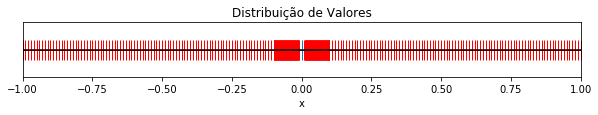

In [15]:
d_1_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
d_2_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
E_values = [0, -1, -2]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            axes.plot( (d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            axes.plot(-(d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, '+', markersize=20)
axes.plot([-10.0, 10.0], [0.0, 0.0], 'k')

axes.set_title("Distribuição de Valores")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-1, 1])
plt.show()

Quais são os limites de underflow e overflow?

O menor número que pode ser representado é:  $1.0 \times 10^{-2} = 0.01$

O maior número que pode ser representado é:  $9.9 \times 10^0 = 9.9$

### Sistemas Binários
Considere agora o sistema com precisão de 2-dígitos  na base 2:

$$
    f=\pm d_1 . d_2 \times 2^E \quad \text{with} \quad E \in [-1, 1]
$$

**Número e distribuição de números**
1. Quantos números podemos representar neste sistema?

2. Qual é a distribuição dos valores representados na linha real?

3. Quais são os limites de underflow e overflow?

Quantos números podemos representar neste sistema?

$$f=\pm d_1 . d_2 \times 2^E ~~~~ \text{with} ~~~~ E \in [-1, 1]$$

$$ 2 \times 1 \times 2 \times 3 + 1 = 13$$

Qual é a distribuição dos valores representados na linha real?

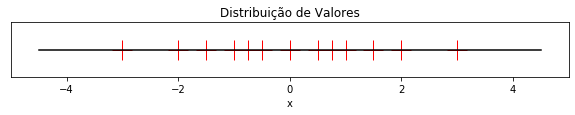

In [16]:
d_1_values = [1]
d_2_values = [0, 1]
E_values = [1, 0, -1]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            axes.plot( (d1 + d2 * 0.5) * 2**E, 0.0, 'r+', markersize=20)
            axes.plot(-(d1 + d2 * 0.5) * 2**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, 'r+', markersize=20)
axes.plot([-4.5, 4.5], [0.0, 0.0], 'k')

axes.set_title("Distribuição de Valores")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-5, 5])
plt.show()

O menor número que pode ser representado é:  $1.0 \times 2^{-1} = 0.5$

O maior número que pode ser representado é:  $1.1 \times 2^1 = 3$


### Sistemas reais - IEEE 754 Binary Floating Point Systems

#### Single Precision (Precisão simples)
 - O armazenamento total alocado é 32 bits
 - O expoente tem 8 bits $\Rightarrow E \in [-126, 127]$
 - Fração 23 bits ($p = 24$)
 
```
s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 1      8 9                     31
```
* Overflow $= 2^{127} \approx 3.4 \times 10^{38}$
* Underflow $= 2^{-126} \approx 1.2 \times 10^{-38}$
* $\epsilon_{\text{machine}} = 2^{-23} \approx 1.2 \times 10^{-7}$

#### Double Precision (Precisão dupla)
 - O armazenamento total alocado é 64 bits
 - O expoente tem 11 bits $\Rightarrow E \in [-1022, 1024]$
 - Fração 52 bits ($p = 53$)
 
```
s EEEEEEEEEE FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FF
0 1       11 12                                                      63
```
* Overflow $= 2^{1024} \approx 1.8 \times 10^{308}$
* Underflow $= 2^{-1022} \approx 2.2 \times 10^{-308}$
* $\epsilon_{\text{machine}} = 2^{-52} \approx 2.2 \times 10^{-16}$

### Python e o IEEE

Para aceder a parâmetros do sistema  de representação em Python, como o epsilon da máquina:

```python
import numpy
numpy.finfo(float).eps
```

In [2]:
print(numpy.finfo(numpy.float16))
print(numpy.finfo(numpy.float32))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------



In [18]:
print(numpy.finfo(float))
#print(numpy.finfo(numpy.float128))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



### Exemplos

In [3]:
eps = numpy.finfo(float).eps
MAX = numpy.finfo(float).max
print('eps = {}'.format(eps))
print('MAX = {}'.format(MAX))

eps = 2.220446049250313e-16
MAX = 1.7976931348623157e+308


Mostre que $(1 + \epsilon_{mach}) > 1$

In [7]:
eps>0

True

In [8]:
1+eps>1

True

In [9]:
eps/2>0

True

In [5]:
1+eps/2>1

False

In [21]:
print(MAX*1)
print(MAX*(1+eps))

1.7976931348623157e+308
inf


<ipython-input-21-37bf8f36b275>:2: RuntimeWarning: overflow encountered in double_scalars
  print(MAX*(1+eps))


Quando representamos por $\overline{x}=3.12\times10^{-2}$ no sistema
vírgula flutuante $x=0.0314$ o erro cometido é de $0.0002$. De forma
similar, o número $x=0.0314159$ é representado por
$\overline{x}=3.14\times10^{-2}$ sendo cometido um erro de
$0.000159$. Assim podemos entender o erro como a discrepância entre
o valor exacto e a sua aproximação
$$\varepsilon_r=x-\overline{x}.$$
A este erro chamamos \emph{erro absoluto} do
uso de $\overline{x}$ para aproximar $x$.

Outra forma de medir o erro cometido quando se aproxima o número
real $x$ por um em virgula flutuante $\overline{x}$ é designado de
erro relativo e consiste no quociente
$$r_x=\frac{x-\overline{x}}{x}$$
Por exemplo o erro relativo que se comete quando se aproxima
$x=3.14159$ por $\overline{x}=3.14\times10^{-2}$ é
$0.00159/3.14159\approx0.0005$

A forma mais natural de medir o erro de arredondamento é o erro
absoluto. No entanto, quando se analisam os erros de arredondamento
provocados por uma fórmula, o erro de arredondamento é uma melhor
medida um vez que leva em conta as grandezas envolvidas.



### A álgebra do sistema não é comutativa... por exemplo
Aritmética $\delta < \epsilon_{\text{machine}}$

   $$(1+\delta) - 1 = 1 - 1 = 0$$

   $$1 - 1 + \delta = \delta$$

In [22]:
eps = numpy.finfo(float).eps
delta = 0.5*eps
print('eps =   {},  1 + eps   > 1 is {}'.format(eps,((1. + eps) > 1.)))
print('delta = {}, 1 + delta > 1 is {}'.format(delta,((1. + delta) > 1.)))
x = 1+delta  -1
y = 1 - 1 + delta
print()
print('1 + delta - 1 = {}'.format(x))
print('1 - 1 + delta = {}'.format(y))

eps =   2.220446049250313e-16,  1 + eps   > 1 is True
delta = 1.1102230246251565e-16, 1 + delta > 1 is False

1 + delta - 1 = 0.0
1 - 1 + delta = 1.1102230246251565e-16


### Propagação de erros

Consideremos agora a propagação de erros por aplicação de uma função
ou operações a aproximações. Assim, pretendemos prever o erro
relativo em $f(\overline{x})$ face ao valor correcto $f(x)$. Note
que se $f$ são funções com derivada de segunda ordem no intervalo
aberto $]\overline{x},x[$, onde se supõe $\overline{x}<x$, pelo
teorema de Taylor
$$f(\overline{x})=f(x)+f'(x)(\overline{x}-x)+R_1(\overline{x}-x)$$
onde $R_1(\overline{x}-x)=\frac{f^{(2)(c)}}{2}(\overline{x}-x)^2$
para $c\in]\overline{x}-x[$. Portanto, desprezando o erro
$R_1(\overline{x}-x)$, obtemos
$$f(\overline{x})\approx f(x)+f'(x)(\overline{x}-x)$$
i.e.
$$f(\overline{x})- f(x)\approx f'(x)(\overline{x}-x)$$
donde
$$\varepsilon_{f(x)}\approx f'(x)\varepsilon_{x}.$$
Dividindo por $f(x)$, obtemos a fórmula para o erro relativo
$$r_{f(x)}\approx\frac{x.f'(x)}{f(x)}r_{x}$$
o que nos permite avaliar a propagação do erro por aplicação duma
função. O valor $P_f(x)=\frac{x.f'(x)}{f(x)}$ é designado
\emph{número de condição} de $f$ em $x$. Se este valor for elevado
isso significa que há um grande incremento do erro relativo por
aplicação da função. Uma situação em que isso é claro, é quando
$P_f(x)$ é muito grande e $r _{x}$ muito pequeno.

De forma semelhante, para funções de várias variáveis, podemos
aplicar a fórmula de Taylor para várias variáveis e obter resultados
análogos. Um caso que nos interessa considerar é o caso de operações
elementares, como a soma ou a multiplicação, que podem ser vistas
como funções de duas variáveis.

Assim, para a soma (ou subtracção) temos
$$
r_{x+y}\approx\frac{x}{x+y}r_x+\frac{y}{x+y}r_y
$$
o que nos indica imediatamente que haverá problemas quando $x\approx
-y$, ou seja no caso da subtracção de quantidades semelhantes. Este
caso é geralmente designado por cancelamento subtractivo e pode ser
responsável pela forte propagação de erros de arredondamento, devido
a um acumular de erros em sucessivas subtracções de quantidades
próximas.

No caso da multiplicação (ou divisão), não se verifica tal problema
$$
r_{xy}\approx r_x+r_y
$$

In [23]:
dx = numpy.array([10**(-n) for n in range(1, 16)])
x = 1.0 + dx
y = -numpy.ones(x.shape)
error = numpy.abs(x + y - dx) / (dx)

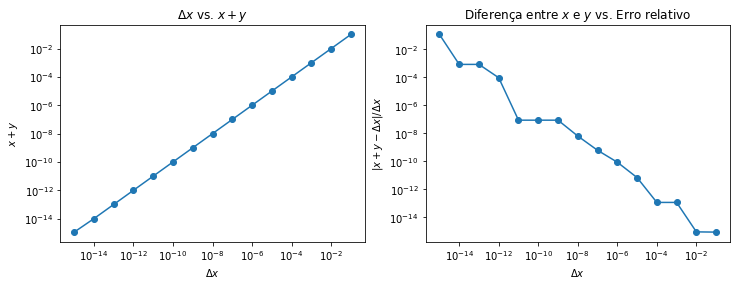

In [24]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1)
axes.loglog(dx, x + y, 'o-')
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$x + y$")
axes.set_title("$\Delta x$ vs. $x+y$")

axes = fig.add_subplot(1, 2, 2)
axes.loglog(dx, error, 'o-')
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|x + y - \Delta x| / \Delta x$")
axes.set_title("Diferença entre $x$ e $y$ vs. Erro relativo")

plt.show()

### Exemplo: Avaliação de Função

Considere a função
$$
    f(x) = \frac{1 - \cos x}{x^2}
$$
com $x\in[-10^{-4}, 10^{-4}]$.  

Tomando o limite como $x \rightarrow 0$ podemos ver o esperado ao avaliar:
$$
    \lim_{x \rightarrow 0} \frac{1 - \cos x}{x^2} = \lim_{x \rightarrow 0} \frac{\sin x}{2 x} = \lim_{x \rightarrow 0} \frac{\cos x}{2} = \frac{1}{2}.
$$

O que acontece quando se usa a representação em virgula flutuante?

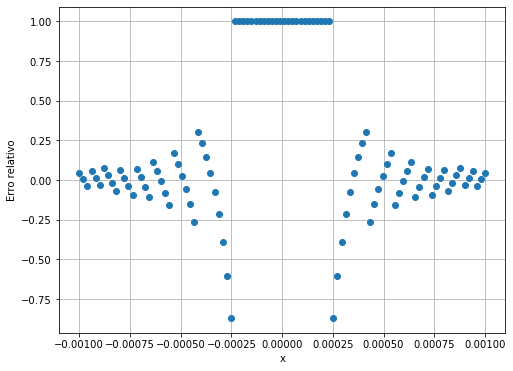

In [25]:
x = numpy.linspace(-1e-3, 1e-3, 100, dtype=numpy.float32)
error = (0.5 - (1.0 - numpy.cos(x)) / x**2) / 0.5

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, error, 'o')
axes.set_xlabel("x")
axes.grid()
axes.set_ylabel("Erro relativo")
plt.show()

### Exemplo: Avaliação de um polinômio

   $$f(x) = x^7 - 7x^6 + 21 x^5 - 35 x^4 + 35x^3-21x^2 + 7x - 1$$
   
Note que: $f(1) = 0$ (e será próximo de zero para $x\approx 1$)

Aqui, comparamos a avaliação do polinómio calculando as potências da forma ingénuas com o método de Horner, usando a implementação `eval_poly(p,x)` anterior.

In [26]:
x = numpy.linspace(0.988, 1.012, 1000, dtype=numpy.float16)
y = x**7 - 7.0 * x**6 + 21.0 * x**5 - 35.0 * x**4 + 35.0 * x**3 - 21.0 * x**2 + 7.0 * x - 1.0

# repindo usando o método de Horner acima
p = numpy.array([1, -7, 21, -35, 35, -21, 7, -1 ])
yh = eval_poly(p,x)

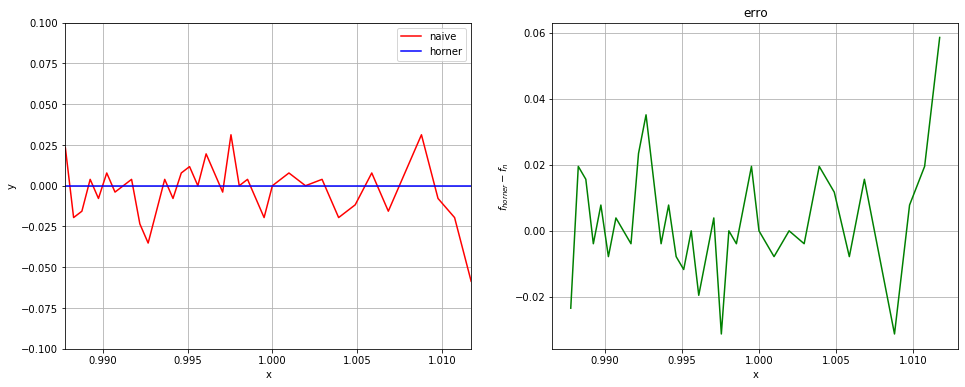

In [27]:
fig = plt.figure(figsize=(8,6))
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1)
axes.plot(x, y, 'r',label='naive')
axes.plot(x, yh, 'b',label='horner')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_ylim((-0.1, 0.1))
axes.set_xlim((x[0], x[-1]))
axes.grid()
axes.legend()

axes = fig.add_subplot(1, 2, 2)
axes.plot(x,yh-y,'g')
axes.grid()
axes.set_xlabel('x')
axes.set_ylabel('$f_{horner} - f_n$')
axes.set_title('erro')
plt.show()

### Exemplo: Avaliação da Função Racional
Calcular $f(x) = x + 1$ pela função $$F(x) = \frac{x^2 - 1}{x - 1}$$.

Espera problemas neste caso?

<ipython-input-28-05dff123f37e>:2: RuntimeWarning: invalid value encountered in true_divide
  f_hat = (x**2 - 1.0) / (x - 1.0)


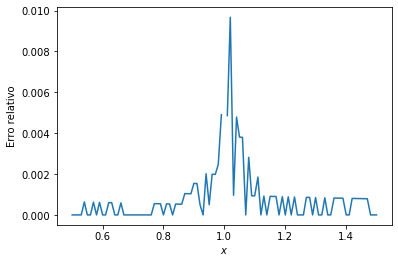

In [28]:
x = numpy.linspace(0.5, 1.5, 101, dtype=numpy.float16)
f_hat = (x**2 - 1.0) / (x - 1.0)
f = (x + 1.0)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.abs(f - f_hat)/numpy.abs(f))
axes.set_xlabel("$x$")
axes.set_ylabel("Erro relativo")
plt.show()

## Condicionamento e estabilidade

Identificamos assim um
outro tipo de problema problema que pode não estar relacionado com a
função a calcular, mas sim com a ordem como o cálculo efectuado no
algoritmo. Poderá acontecer que dois algoritmos diferentes,
equivalentes do ponto vista algébrico, não o sejam do ponto de vista
numérico, devido à propagação de erros. Distinguimos assim duas
noções:

#### Definição: 
Um problema diz-se `bem condicionado` se pequenos erros relativos nos dados produzem pequenos erros relativos no resultado. Caso contrário, diz-se `mal condicionado`.

O caso de mau condicionamento para cálculo de uma função corresponde
a ter um número de condição $P_f=\max\{\frac{x.f'(x)}{f(x)}:x\in [a,b]\}$ elevado.

- Se $P_f <= 1$, problema é bem condicionado
- Se $P_f > 1$, problema é mal condicionado

#### Definição: 
Um algoritmo é `numericamente estável` se a pequenos erros
relativos dos dados, e a pequenos valores da unidade de
arredondamento, corresponder um pequeno erro relativo nos
resultados. Caso contrário, diz-se numericamente `instável`.



As expressões abaixo são equivalentes:
$$f_1(x)=\sqrt{x}(\sqrt{x+1}-\sqrt{x}),\,f_2=\frac{\sqrt{x}}{\sqrt{x+1}+\sqrt{x}}$$
nesse sentido esperamos que dêem exactamente os mesmos resultados.

![title](./images/nm122r.jpg)

Os resultados são naturalmente intrigantes. O incremento do valor de
$x$ faz com que $f_1(x)$ oscile enquanto que o valor de $f_2(x)$
converge para $1/2$. O que se passa com o $f_2$ resulta da drástica
redução do número de dígitos significativos quando se subtrai
$\sqrt{x+1}-\sqrt{x}$, designada por perda de significância. Para
vermos de perto este fenómeno tomemos $x=10^{15}$. Assim temos
$$\sqrt{x+1}=3.162277660168381\times10^7 = 31622776.60168381$$
$$\sqrt{x}=3.162277660168379\times10^7 = 31622776.60168379$$
Ambos os números têm 52 bits significativos, ou dito de forma
equivalente 16 dígitos significativos. Donde temos
$$\sqrt{x+1}+\sqrt{x}=63245553.20336761$$
$$\sqrt{x+1}-\sqrt{x}=0.00000001862645149230957\approx0.00000002$$
o número de dígitos significativos foi reduzida de 16 para 1. A
baixo apresentamos

![title](./images/cancellation.jpg)

Nesta secção apresentamos alguns truques que evitam a hipótese de
ocorram erros grandes.

Por forma a evitar que se dêem erros por anulamento subtractivo é
importante que não subtraiam números com igual valor. Por exemplo
para se determinar as soluções da equação de segundo grau
$ax^2+bx+c=0$ usando a fórmula resolvente:
$$
x_1=\frac{-b+\sqrt{b^2-4ac}}{2a},\, x_2=\frac{-b-\sqrt{b^2-4ac}}{2a}
$$
Se o valor de $|4ac|$ for muito próximo de $b^2$, dependendo do
sinal de $b$ provocamos um cancelamento subtractivo no cálculo de
$x_1$ ou $x_2$. Isto pode ser contornado se calcularmos primeiro a
raiz de maior valor absoluto e depois obter a outra raiz usando a
relação $x_1x_2=c/a$.

### Exemplo:

Considerando as duas funções, que são analiticamente equivalentes:
$$
f_1(x)=\frac{1-\cos(x)}{x^2},\,f_2(x)=\frac{\sin^2(x)}{x^2(1+\cos(x))}
$$
A função $f_1$ é segura para valores de $x$ muito próximo de $\pi$
enquanto o termo $1+\cos(x)$ de $f_2$ pode provocar cancelamento
subtractivo, enquanto para valores de $x$ muito próximos de $0$ a
função $f_2$ é mais segura que $f_1$. Podemos constatar isso:

![title](./images/nm125_2r.jpg)

Uma forma útil para evitar o cancelamento subtractivo é usar uma
série de Taylor. Supondo que cremos calcular
$$
f_3(x)=\frac{e^x-1}{x}\,\text{ em } x=0
$$
Aproximando a função $e^x$ usando um polinómio de Taylor de ordem 4
nas vizinhas do ponto zero temos:
$$
e^x\approx 1 +x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\frac{1}{4!}x^4
$$
donde
$$
e^x-1\approx x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\frac{1}{4!}x^4
$$
ou seja
$$
\frac{e^x-1}{x}\approx 1
+\frac{1}{2!}x+\frac{1}{3!}x^2+\frac{1}{4!}x^3=f_4(x)
$$
Comparando os resultados de $f_3$ e $f_4$
nas vizinhanças de $x=0$

![title](./images/nm125_3r.jpg)


## Combinação de erro

Em geral, precisamos nos preocupar com a combinação de erro de discretização com os erro de representação.

Erro de discretização: erros que ocorrem da aproximação de uma função, truncamento por exemplo os termos de uma série...

$$\sin x \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} + O(x^7)$$

Erro de virgula flutuante: erros decorrentes da aproximação de números reais com números de precisão finita

$$\pi \approx 3.14$$

ou $\frac{1}{3} \approx 0.333333333$ em decimal, os resultados formam um número finito de registros para representar cada número.

### Example 1

Considere a aproximação das diferenças finitas em que $f(x) = e^x$ a avaliar em $x=1$?

$$f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x} \text(Unilateral)$$
$$f'(x) \approx \frac{f(x + \Delta x) - f(x - \Delta )}{2\Delta x} \text(Centrado)$$
Compare o erro entre fazer diminuir $\Delta x$ e a solução exata $f'(1) = e$.

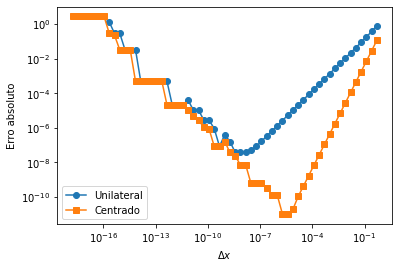

In [29]:
delta_x = numpy.array([2.0**(-n) for n in range(1, 60)])
x = 1.0
f_hat_1 = (numpy.exp(x + delta_x) - numpy.exp(x)) / (delta_x)
f_hat_2 = (numpy.exp(x + delta_x) - numpy.exp(x - delta_x)) / (2.0 * delta_x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(delta_x, numpy.abs(f_hat_1 - numpy.exp(1)), 'o-', label="Unilateral")
axes.loglog(delta_x, numpy.abs(f_hat_2 - numpy.exp(1)), 's-', label="Centrado")
axes.legend(loc=3)
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("Erro absoluto")
plt.show()

### Example 2

Avalie $e^x$ usando a série de Taylor.

$$e^x = \sum^\infty_{n=0} \frac{x^n}{n!}$$

Podemos escolher $N < \infty$ de forma a aproximar $e^x$ no intervalo $x \in [a,b]$ de forma a que o erro relativo $E$ satisfaz $E < 8 \cdot \varepsilon_{\text{machine}}$?

Comecemos por definir uma função que simplesmente avalie o polinómio de Taylor diretamente para diferentes valores de  $N$.

In [30]:
from scipy.special import factorial

def my_exp(x, N=10):
    value = 0.0
    for n in range(N + 1):
        value += x**n / numpy.float(factorial(n))
        
    return value

Testemos... para ver o que acontece.

In [31]:
eps = numpy.finfo(float).eps

x = numpy.linspace(-2., 50., 100, dtype=numpy.float)
for N in range(1, 300):
    error = numpy.abs((numpy.exp(x) - my_exp(x, N=N)) / numpy.exp(x))
    if numpy.all(error < 8.0 * eps):
        break

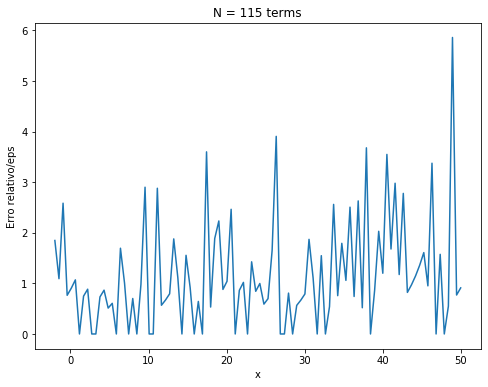

In [32]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, error/eps)
axes.set_xlabel("x")
axes.set_ylabel("Erro relativo/eps")
axes.set_title('N = {} terms'.format(N))
plt.show()

Alguns links que podem ser úteis:
 - [What Every Computer Scientist Should Know About Floating-Point Arithmetic](http://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html)
 - [IEEE 754 Floating Point Calculator](http://babbage.cs.qc.edu/courses/cs341/IEEE-754.html)
 - [Numerical Computing with IEEE Floating Point Arithmetic](http://epubs.siam.org/doi/book/10.1137/1.9780898718072)

## Contando operações

Erro de Discretização:  **Por que não usar mais termos da série Taylor?**

Erro de virgula flutuante: **Por que não usar a maior precisão possível?**

### Exemplo 1: Multiplicação matriz-vetor

Seja $A, B \in \mathbb{R}^{N \times N}$ e $x \in \mathbb{R}^N$.  

1. Conte o número aproximado de operações necessárias para calcular $A x$.
2. Faça o mesmo para $A B$.

Produto vetor matricial:  Seja $[A]_i$ a linha $i$th de $A$ e $A_{ij}$ como a entrada $i$, $j$th temos
$$
    A x = \sum^N_{i=1} [A]_i \cdot x = \sum^N_{i=1} \sum^N_{j=1} A_{ij} x_j
$$

Oara $N = 3$ temos
$$
    A x = [A]_1 \cdot v + [A]_2 \cdot v + [A]_3 \cdot v = \begin{bmatrix}
        A_{11} \times v_1 + A_{12} \times v_2 + A_{13} \times v_3 \\
        A_{21} \times v_1 + A_{22} \times v_2 + A_{23} \times v_3 \\
        A_{31} \times v_1 + A_{32} \times v_2 + A_{33} \times v_3
    \end{bmatrix}
$$

Neste caso são 15 operações (6 adições e 9 multiplicações).

Para $N = 4$ temos
$$
    A x = [A]_1 \cdot v + [A]_2 \cdot v + [A]_3 \cdot v = \begin{bmatrix}
        A_{11} \times v_1 + A_{12} \times v_2 + A_{13} \times v_3 + A_{14} \times v_4 \\
        A_{21} \times v_1 + A_{22} \times v_2 + A_{23} \times v_3 + A_{24} \times v_4 \\
        A_{31} \times v_1 + A_{32} \times v_2 + A_{33} \times v_3 + A_{34} \times v_4 \\
        A_{41} \times v_1 + A_{42} \times v_2 + A_{43} \times v_3 + A_{44} \times v_4 \\
    \end{bmatrix}
$$

São nesye caso 28 operações (12 adições e 16 multiplicações).

Generalizando isso, existem $N^2$ multiplicações e $N (N -1)$ adições num total de

$$
    \text{operações} = N (N - 1) + N^2 = \mathcal{O}(N^2).
$$

Produto Matriz-Matriz ($AB$):  Seja $[B]_j$ a coluna $j$ de $B$ temos
$$
    (A B)_{ij} = \sum^N_{i=1} \sum^N_{j=1} [A]_i \cdot [B]_j
$$
O produto interno de dois vetores é representado por
$$
    a \cdot b = \sum^N_{i=1} a_i b_i
$$
que é definido por $\mathcal{O}(3N)$ operações.  Uma vez que existem $N^2$ entradas na matriz resultante, temos $\mathcal{O}(N^3)$ operações.

Existem métodos para executar a multiplicação matriz-matriz mais eficientes que o usual. Na figura a seguir, apresentamos  a evolução de dos algoritmos para multiplicar matrizes em termos do número de operações. No eixo do $y$ deve ler
$$
    \mathcal{O}(N^\omega)
$$
![matrix multiplication operation bound](./images/bound_matrix_multiply.png)

## Exercícios

1- Para 100 valores de $x$ no intervalo $[10^{14},10^{16}]$,
avalie as duas expressões abaixo, apresente os seus gráficos  e
identifique a que é mais estável quanto à perda de dígitos
significativos:
- $y=\sqrt{2x^2+1}-1$
- $y=\frac{2x^2}{\sqrt{2x^2+1}+1}$

2- Para 100 valores de $x$ no intervalo $[10^{-9},10^{-7.4}]$,
  avalie as duas expressões abaixo, apresente os seus gráficos  e
  identifique a que é mais estável quanto à perda de dígitos
  significativos:
- $y=\sqrt{x+4}-\sqrt{x+3}$
- $y=\frac{1}{\sqrt{x+4}+\sqrt{x+3}}$

3- Um rectângulo mede 20cm$\pm0.2$ de largura 31cm$\pm0.4$ de comprimento:
1. Calcule a área deste rectângulo mostrando o intervalo de
    valores possíveis.
2. Determine uma estimativa do valor da área deste rectângulo
    e calcule uma estimativa do limite superior do erro absoluto da
    área do rectângulo.

4- A equação que descreve a velocidade de um objecto em queda
  livre é dada por
  $$
      v(t)=\frac{gm}{c}(1-e^{-(c/m)t})
  $$
  onde $g$ é a aceleração devido à gravidade, $c$ é o coeficiente de
  atrito e $m$ a massa do objecto. Estime o erro de $v$, avaliado em
  $t=6$, se $g\approx9.8$, $m=50\pm0.5$ e $c=12.5\pm2$.

5- Determine o número de termos necessário para aproximar
  $\cos(0.3\pi)$ a 8 algarismos significativos usando o desenvolvimento em série de
  Maclaurin
  $$\cos(x)=1-\frac{x^2}{2}+\frac{x^4}{4!}-\frac{x^6}{6!}+\frac{x^8}{8!}-\ldots$$